## ДЗ2
В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

Задание 1: отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 2: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

Задание 4: для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 5: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

Задание 6: обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

Задание 7: для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

Задание 8: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

Задание 9: обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

Задание 10: построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

Задание 1: Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.
Задание 2: построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.
Задание 3: построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.
Задание 4: построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

In [2]:
import warnings
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc

import catboost as cb
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")

In [3]:
train = pd.read_csv('assignment_2_train.csv')
test = pd.read_csv('assignment_2_test.csv')
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


In [5]:
target = train['isFraud']
train = train.drop(['isFraud', 'TransactionID'], axis=1)

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [6]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

count of numeric_features 378


In [18]:
x_train, x_valid = train_test_split(
    numerical_features, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 125999 rows, 378 cols
x_valid.shape = 54001 rows, 378 cols


In [19]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [20]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 500,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [21]:
model_xgb_nf = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=50,
    maximize=True,
)

[0]	train-auc:0.648969	valid-auc:0.652319
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.88254	valid-auc:0.873639
[100]	train-auc:0.900099	valid-auc:0.887375
[150]	train-auc:0.904494	valid-auc:0.890759
Stopping. Best iteration:
[126]	train-auc:0.904494	valid-auc:0.890759



**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

In [22]:
categorical_features = train.select_dtypes(include=[np.object])
print(f"Categorical Feature Count {categorical_features.shape[1]}")
categorical_features.head(n=2)

Categorical Feature Count 14


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN


In [41]:
cat_ft =  categorical_features.columns.tolist()
cat_ft

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [23]:
train_cat = train.copy()

for cat_colname in train.select_dtypes(include='object').columns[1:]:
    train_cat = pd.concat([train_cat, pd.get_dummies(train[cat_colname], prefix=cat_colname)], axis=1)

In [24]:
train_cat.head(2)

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,1,0,0,1,0,0,0,0,0,0
1,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,0,1,0,1,0,0,0,0,0,0


In [25]:
for cat_colname in categorical_features:
    train_cat = train_cat.drop([cat_colname], axis=1)

In [26]:
x_train, x_valid = train_test_split(
    train_cat, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 125999 rows, 524 cols
x_valid.shape = 54001 rows, 524 cols


In [27]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [28]:
model_xgb_cf = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=50,
    maximize=True,
)

[0]	train-auc:0.648969	valid-auc:0.652319
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.88585	valid-auc:0.878157
[100]	train-auc:0.906878	valid-auc:0.894555
[150]	train-auc:0.914659	valid-auc:0.900802
[200]	train-auc:0.915638	valid-auc:0.90167
[250]	train-auc:0.91589	valid-auc:0.90179
Stopping. Best iteration:
[201]	train-auc:0.91589	valid-auc:0.90179



**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [29]:
x_train, x_valid = train_test_split(
    numerical_features, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)

In [30]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

In [31]:
params = {
    "boosting_type": "goss",
    "objective": "binary",
    "metric": "auc",
    "learning_rate": 0.01,
    "n_estimators": 10000,
    "n_jobs": 6,
    "seed": 27
}

In [32]:
model_lgbm_nf = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=250
)

Training until validation scores don't improve for 50 rounds.
[250]	training's auc: 0.920544	valid_1's auc: 0.899484
[500]	training's auc: 0.947387	valid_1's auc: 0.917301
[750]	training's auc: 0.961377	valid_1's auc: 0.927308
[1000]	training's auc: 0.97004	valid_1's auc: 0.932587
[1250]	training's auc: 0.976234	valid_1's auc: 0.936483
[1500]	training's auc: 0.980727	valid_1's auc: 0.939148
[1750]	training's auc: 0.984407	valid_1's auc: 0.941095
[2000]	training's auc: 0.987082	valid_1's auc: 0.942874
[2250]	training's auc: 0.989204	valid_1's auc: 0.944186
[2500]	training's auc: 0.990802	valid_1's auc: 0.945154
[2750]	training's auc: 0.992267	valid_1's auc: 0.945924
[3000]	training's auc: 0.993441	valid_1's auc: 0.946427
[3250]	training's auc: 0.994486	valid_1's auc: 0.947237
[3500]	training's auc: 0.995242	valid_1's auc: 0.947678
[3750]	training's auc: 0.99602	valid_1's auc: 0.948026
[4000]	training's auc: 0.996609	valid_1's auc: 0.948537
[4250]	training's auc: 0.997134	valid_1's auc: 

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

In [33]:
x_train, x_valid = train_test_split(
    train_cat, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)

In [34]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid
)

In [35]:
model_lgbm_cf = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature="auto",
    early_stopping_rounds=50,
    verbose_eval=250
)

Training until validation scores don't improve for 50 rounds.
[250]	training's auc: 0.927921	valid_1's auc: 0.907481
[500]	training's auc: 0.954263	valid_1's auc: 0.924433
[750]	training's auc: 0.967446	valid_1's auc: 0.933382
[1000]	training's auc: 0.975532	valid_1's auc: 0.938776
[1250]	training's auc: 0.981538	valid_1's auc: 0.942558
[1500]	training's auc: 0.985354	valid_1's auc: 0.94496
[1750]	training's auc: 0.988264	valid_1's auc: 0.946944
[2000]	training's auc: 0.990506	valid_1's auc: 0.94866
[2250]	training's auc: 0.992283	valid_1's auc: 0.949677
[2500]	training's auc: 0.993678	valid_1's auc: 0.9505
[2750]	training's auc: 0.994779	valid_1's auc: 0.951354
[3000]	training's auc: 0.995657	valid_1's auc: 0.952003
[3250]	training's auc: 0.996391	valid_1's auc: 0.952498
[3500]	training's auc: 0.996997	valid_1's auc: 0.95281
[3750]	training's auc: 0.997487	valid_1's auc: 0.953158
[4000]	training's auc: 0.997877	valid_1's auc: 0.953492
[4250]	training's auc: 0.998244	valid_1's auc: 0.9

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

In [36]:
train_cat_cat = train.copy()

In [37]:
for c in categorical_features:
    train_cat_cat[c] = train_cat_cat[c].astype('category')

In [43]:
x_train, x_valid = train_test_split(
    train_cat_cat, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)

In [44]:
dtrain = lgb.Dataset(
    data=x_train, label=y_train, categorical_feature = cat_ft
)
dvalid = lgb.Dataset(
    data=x_valid, label=y_valid, categorical_feature = cat_ft
)

In [45]:
model_lgbm_cat = lgb.train(
    params=params,
    train_set=dtrain,
    num_boost_round=10000,
    valid_sets=[dtrain, dvalid],
    categorical_feature=cat_ft,
    early_stopping_rounds=50,
    verbose_eval=250
)

Training until validation scores don't improve for 50 rounds.
[250]	training's auc: 0.929812	valid_1's auc: 0.910278
[500]	training's auc: 0.956558	valid_1's auc: 0.926763
[750]	training's auc: 0.969013	valid_1's auc: 0.935254
[1000]	training's auc: 0.977435	valid_1's auc: 0.940194
[1250]	training's auc: 0.982768	valid_1's auc: 0.943376
[1500]	training's auc: 0.986515	valid_1's auc: 0.945653
[1750]	training's auc: 0.98946	valid_1's auc: 0.947499
[2000]	training's auc: 0.991547	valid_1's auc: 0.948728
[2250]	training's auc: 0.993124	valid_1's auc: 0.94975
[2500]	training's auc: 0.994384	valid_1's auc: 0.950835
[2750]	training's auc: 0.995315	valid_1's auc: 0.951574
[3000]	training's auc: 0.996093	valid_1's auc: 0.952287
[3250]	training's auc: 0.996779	valid_1's auc: 0.952822
[3500]	training's auc: 0.997344	valid_1's auc: 0.953373
[3750]	training's auc: 0.997837	valid_1's auc: 0.953685
[4000]	training's auc: 0.998223	valid_1's auc: 0.954002
[4250]	training's auc: 0.998563	valid_1's auc: 

При обработке категорий встроенным методом качество обучения выше на 0,0005 на трейне и 0,0008 на валидации. Также оно немного дольше длилось.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).


In [48]:
x_train, x_valid = train_test_split(
    numerical_features, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)
train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [49]:
cb_params = {
    "n_estimators": 5000,
    "loss_function": "Logloss",
    "eval_metric": "AUC",
    "task_type": "CPU",
    "max_bin": 20,
    "verbose": 250,
    "max_depth": 6,
    "l2_leaf_reg": 100,
    "early_stopping_rounds": 50,
    "thread_count": 6,
    "random_seed": 100
}

In [50]:
model_cat_nf = cb.CatBoostClassifier(**cb_params)
model_cat_nf.fit(train_pool, eval_set=valid_pool)

0:	test: 0.6238927	best: 0.6238927 (0)	total: 177ms	remaining: 14m 46s
250:	test: 0.8753309	best: 0.8753309 (250)	total: 35s	remaining: 11m 1s
500:	test: 0.8824036	best: 0.8824036 (500)	total: 1m 8s	remaining: 10m 11s
750:	test: 0.8829745	best: 0.8829745 (750)	total: 1m 40s	remaining: 9m 31s
1000:	test: 0.8842487	best: 0.8842490 (999)	total: 2m 17s	remaining: 9m 9s
1250:	test: 0.8862733	best: 0.8862733 (1250)	total: 2m 53s	remaining: 8m 41s
1500:	test: 0.8901239	best: 0.8901239 (1500)	total: 3m 31s	remaining: 8m 12s
1750:	test: 0.8922147	best: 0.8922147 (1750)	total: 4m 11s	remaining: 7m 46s
2000:	test: 0.8948694	best: 0.8948694 (2000)	total: 4m 47s	remaining: 7m 10s
2250:	test: 0.8965852	best: 0.8965852 (2250)	total: 5m 22s	remaining: 6m 33s
2500:	test: 0.8979998	best: 0.8980001 (2499)	total: 5m 57s	remaining: 5m 57s
2750:	test: 0.8990013	best: 0.8990013 (2745)	total: 6m 32s	remaining: 5m 21s
3000:	test: 0.8999620	best: 0.8999620 (3000)	total: 7m 8s	remaining: 4m 45s
3250:	test: 0.901

**Задание 8**: обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7

In [51]:
x_train, x_valid = train_test_split(
    train_cat, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)

train_pool = cb.Pool(x_train, y_train)
valid_pool = cb.Pool(x_valid, y_valid)

In [52]:
model_cat_cf = cb.CatBoostClassifier(**cb_params)
model_cat_cf.fit(train_pool, eval_set=valid_pool)

0:	test: 0.6297449	best: 0.6297449 (0)	total: 152ms	remaining: 12m 40s
250:	test: 0.8827146	best: 0.8827146 (250)	total: 38.8s	remaining: 12m 13s
500:	test: 0.8907982	best: 0.8907982 (500)	total: 1m 16s	remaining: 11m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8912552977
bestIteration = 666

Shrink model to first 667 iterations.


**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

In [53]:
train_cat_str = train.copy()

In [54]:
for c in categorical_features:
    train_cat_str[c] = train_cat_str[c].astype('str')

In [56]:
x_train, x_valid = train_test_split(
    train_cat_str, train_size=0.7, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.7, random_state=1
)


train_pool = cb.Pool(x_train, y_train, cat_features = cat_ft)
valid_pool = cb.Pool(x_valid, y_valid, cat_features = cat_ft)

In [57]:
model_cat_cat = cb.CatBoostClassifier(**cb_params)
model_cat_cat.fit(train_pool, eval_set=valid_pool)

0:	test: 0.7319800	best: 0.7319800 (0)	total: 725ms	remaining: 1h 23s
250:	test: 0.8840376	best: 0.8840376 (250)	total: 2m 30s	remaining: 47m 25s
500:	test: 0.8923976	best: 0.8923976 (500)	total: 5m 8s	remaining: 46m 13s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8954210501
bestIteration = 681

Shrink model to first 682 iterations.


In [ ]:
Встроенный метод снова оказался лучше, на это раз куда заметнее, на 0.004

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.

In [60]:
test_target = test['isFraud']
test = test.drop(['isFraud', 'TransactionID'], axis=1)

In [61]:
numerical_ft = numerical_features.columns.tolist()

In [85]:
test_numerical_ft = test[numerical_ft]

In [95]:
'''
test_cat = test.copy()
for cat_colname in cat_ft:
    test_cat = pd.concat([test_cat, pd.get_dummies(test[cat_colname], prefix=cat_colname)], axis=1)
    
'''

In [96]:
test_cat

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,7415038,226.000,W,12473,555.0,150.0,visa,226.0,credit,299.0,...,0,1,1,0,1,0,1,0,0,1
1,7415054,3072.000,W,15651,417.0,150.0,visa,226.0,debit,330.0,...,0,0,0,1,0,0,0,0,0,0
2,7415081,319.950,W,13844,583.0,150.0,visa,226.0,credit,126.0,...,0,0,0,1,1,0,1,0,0,1
3,7415111,171.000,W,11556,309.0,150.0,visa,226.0,debit,181.0,...,0,1,0,1,1,0,0,1,0,1
4,7415112,107.950,W,10985,555.0,150.0,visa,226.0,debit,231.0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,10091528,368.990,W,13964,496.0,150.0,mastercard,224.0,debit,299.0,...,0,0,1,0,1,0,1,0,0,1
99997,10091533,445.330,W,10616,583.0,150.0,visa,226.0,credit,472.0,...,0,0,0,1,0,0,0,0,0,0
99998,10091544,15.226,C,9803,583.0,150.0,visa,226.0,credit,NaN,...,0,0,0,0,0,0,0,0,0,0
99999,10091549,34.742,C,16062,500.0,185.0,mastercard,137.0,credit,284.0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
for cat_colname in cat_ft:
    test_cat = test_cat.drop([cat_colname], axis=1)
test_cat 

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,7415038,226.000,12473,555.0,150.0,226.0,299.0,87.0,116.0,NaN,...,0,1,1,0,1,0,1,0,0,1
1,7415054,3072.000,15651,417.0,150.0,226.0,330.0,87.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
2,7415081,319.950,13844,583.0,150.0,226.0,126.0,87.0,9.0,NaN,...,0,0,0,1,1,0,1,0,0,1
3,7415111,171.000,11556,309.0,150.0,226.0,181.0,87.0,3.0,NaN,...,0,1,0,1,1,0,0,1,0,1
4,7415112,107.950,10985,555.0,150.0,226.0,231.0,87.0,0.0,NaN,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,10091528,368.990,13964,496.0,150.0,224.0,299.0,87.0,NaN,NaN,...,0,0,1,0,1,0,1,0,0,1
99997,10091533,445.330,10616,583.0,150.0,226.0,472.0,87.0,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
99998,10091544,15.226,9803,583.0,150.0,226.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
99999,10091549,34.742,16062,500.0,185.0,137.0,284.0,60.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [68]:
test_cat2 = test.copy()

for c in categorical_features:
    test_cat2[c] = test_cat2[c].astype('category')
   

test_cat_str = test.copy()

for c in categorical_features:
    test_cat_str[c] = test_cat_str[c].astype('str')

In [69]:
test_xgb_nf = xgb.DMatrix(data=test_numerical_features)
test_xgb_nf

In [99]:
test_xgb_cf = xgb.DMatrix(data=test_cat)
test_xgb_cf

In [74]:
test_xgb_nf = xgb.DMatrix(data=test_numerical_features)
test_xgb_cf = xgb.DMatrix(data=test_cat)

test_lgbm_nf = lgb.Dataset(data=test_numerical_features)
test_lgbm_cf = lgb.Dataset(data=test_cat)
test_lgbm_cat = lgb.Dataset(data=test_cat2, categorical_feature = cat_ft)

test_cat_nf = cb.Pool(test_numerical_features)
test_cat_cf = cb.Pool(test_cat)
test_cat_cat = cb.Pool(test_cat_str, cat_features = cat_ft)

ValueError: feature_names mismatch: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'card4_american express', 'card4_discover', 'card4_mastercard', 'card4_visa', 'card6_charge card', 'card6_credit', 'card6_debit', 'card6_debit or credit', 'P_emaildomain_aim.com', 'P_emaildomain_anonymous.com', 'P_emaildomain_aol.com', 'P_emaildomain_att.net', 'P_emaildomain_bellsouth.net', 'P_emaildomain_cableone.net', 'P_emaildomain_centurylink.net', 'P_emaildomain_cfl.rr.com', 'P_emaildomain_charter.net', 'P_emaildomain_comcast.net', 'P_emaildomain_cox.net', 'P_emaildomain_earthlink.net', 'P_emaildomain_embarqmail.com', 'P_emaildomain_frontier.com', 'P_emaildomain_frontiernet.net', 'P_emaildomain_gmail', 'P_emaildomain_gmail.com', 'P_emaildomain_gmx.de', 'P_emaildomain_hotmail.co.uk', 'P_emaildomain_hotmail.com', 'P_emaildomain_hotmail.de', 'P_emaildomain_hotmail.es', 'P_emaildomain_hotmail.fr', 'P_emaildomain_icloud.com', 'P_emaildomain_juno.com', 'P_emaildomain_live.com', 'P_emaildomain_live.com.mx', 'P_emaildomain_live.fr', 'P_emaildomain_mac.com', 'P_emaildomain_mail.com', 'P_emaildomain_me.com', 'P_emaildomain_msn.com', 'P_emaildomain_netzero.com', 'P_emaildomain_netzero.net', 'P_emaildomain_optonline.net', 'P_emaildomain_outlook.com', 'P_emaildomain_outlook.es', 'P_emaildomain_prodigy.net.mx', 'P_emaildomain_protonmail.com', 'P_emaildomain_ptd.net', 'P_emaildomain_q.com', 'P_emaildomain_roadrunner.com', 'P_emaildomain_rocketmail.com', 'P_emaildomain_sbcglobal.net', 'P_emaildomain_sc.rr.com', 'P_emaildomain_servicios-ta.com', 'P_emaildomain_suddenlink.net', 'P_emaildomain_twc.com', 'P_emaildomain_verizon.net', 'P_emaildomain_web.de', 'P_emaildomain_windstream.net', 'P_emaildomain_yahoo.co.jp', 'P_emaildomain_yahoo.co.uk', 'P_emaildomain_yahoo.com', 'P_emaildomain_yahoo.com.mx', 'P_emaildomain_yahoo.de', 'P_emaildomain_yahoo.es', 'P_emaildomain_yahoo.fr', 'P_emaildomain_ymail.com', 'R_emaildomain_aim.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_aol.com', 'R_emaildomain_att.net', 'R_emaildomain_bellsouth.net', 'R_emaildomain_cableone.net', 'R_emaildomain_centurylink.net', 'R_emaildomain_cfl.rr.com', 'R_emaildomain_charter.net', 'R_emaildomain_comcast.net', 'R_emaildomain_cox.net', 'R_emaildomain_earthlink.net', 'R_emaildomain_embarqmail.com', 'R_emaildomain_frontier.com', 'R_emaildomain_frontiernet.net', 'R_emaildomain_gmail', 'R_emaildomain_gmail.com', 'R_emaildomain_gmx.de', 'R_emaildomain_hotmail.co.uk', 'R_emaildomain_hotmail.com', 'R_emaildomain_hotmail.de', 'R_emaildomain_hotmail.es', 'R_emaildomain_hotmail.fr', 'R_emaildomain_icloud.com', 'R_emaildomain_juno.com', 'R_emaildomain_live.com', 'R_emaildomain_live.com.mx', 'R_emaildomain_live.fr', 'R_emaildomain_mac.com', 'R_emaildomain_mail.com', 'R_emaildomain_me.com', 'R_emaildomain_msn.com', 'R_emaildomain_netzero.com', 'R_emaildomain_netzero.net', 'R_emaildomain_optonline.net', 'R_emaildomain_outlook.com', 'R_emaildomain_outlook.es', 'R_emaildomain_prodigy.net.mx', 'R_emaildomain_protonmail.com', 'R_emaildomain_ptd.net', 'R_emaildomain_q.com', 'R_emaildomain_roadrunner.com', 'R_emaildomain_rocketmail.com', 'R_emaildomain_sbcglobal.net', 'R_emaildomain_sc.rr.com', 'R_emaildomain_scranton.edu', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_suddenlink.net', 'R_emaildomain_twc.com', 'R_emaildomain_verizon.net', 'R_emaildomain_web.de', 'R_emaildomain_windstream.net', 'R_emaildomain_yahoo.co.jp', 'R_emaildomain_yahoo.co.uk', 'R_emaildomain_yahoo.com', 'R_emaildomain_yahoo.com.mx', 'R_emaildomain_yahoo.de', 'R_emaildomain_yahoo.es', 'R_emaildomain_yahoo.fr', 'R_emaildomain_ymail.com', 'M1_F', 'M1_T', 'M2_F', 'M2_T', 'M3_F', 'M3_T', 'M4_M0', 'M4_M1', 'M4_M2', 'M5_F', 'M5_T', 'M6_F', 'M6_T', 'M7_F', 'M7_T', 'M8_F', 'M8_T', 'M9_F', 'M9_T'] ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'ProductCD_C', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W', 'card4_american express', 'card4_discover', 'card4_mastercard', 'card4_visa', 'card6_charge card', 'card6_credit', 'card6_debit', 'card6_debit or credit', 'P_emaildomain_aim.com', 'P_emaildomain_anonymous.com', 'P_emaildomain_aol.com', 'P_emaildomain_att.net', 'P_emaildomain_bellsouth.net', 'P_emaildomain_cableone.net', 'P_emaildomain_centurylink.net', 'P_emaildomain_cfl.rr.com', 'P_emaildomain_charter.net', 'P_emaildomain_comcast.net', 'P_emaildomain_cox.net', 'P_emaildomain_earthlink.net', 'P_emaildomain_embarqmail.com', 'P_emaildomain_frontier.com', 'P_emaildomain_frontiernet.net', 'P_emaildomain_gmail', 'P_emaildomain_gmail.com', 'P_emaildomain_gmx.de', 'P_emaildomain_hotmail.co.uk', 'P_emaildomain_hotmail.com', 'P_emaildomain_hotmail.de', 'P_emaildomain_hotmail.es', 'P_emaildomain_hotmail.fr', 'P_emaildomain_icloud.com', 'P_emaildomain_juno.com', 'P_emaildomain_live.com', 'P_emaildomain_live.com.mx', 'P_emaildomain_live.fr', 'P_emaildomain_mac.com', 'P_emaildomain_mail.com', 'P_emaildomain_me.com', 'P_emaildomain_msn.com', 'P_emaildomain_netzero.com', 'P_emaildomain_netzero.net', 'P_emaildomain_optonline.net', 'P_emaildomain_outlook.com', 'P_emaildomain_outlook.es', 'P_emaildomain_prodigy.net.mx', 'P_emaildomain_protonmail.com', 'P_emaildomain_ptd.net', 'P_emaildomain_q.com', 'P_emaildomain_roadrunner.com', 'P_emaildomain_rocketmail.com', 'P_emaildomain_sbcglobal.net', 'P_emaildomain_sc.rr.com', 'P_emaildomain_servicios-ta.com', 'P_emaildomain_suddenlink.net', 'P_emaildomain_twc.com', 'P_emaildomain_verizon.net', 'P_emaildomain_web.de', 'P_emaildomain_windstream.net', 'P_emaildomain_yahoo.co.jp', 'P_emaildomain_yahoo.co.uk', 'P_emaildomain_yahoo.com', 'P_emaildomain_yahoo.com.mx', 'P_emaildomain_yahoo.de', 'P_emaildomain_yahoo.es', 'P_emaildomain_yahoo.fr', 'P_emaildomain_ymail.com', 'R_emaildomain_aim.com', 'R_emaildomain_anonymous.com', 'R_emaildomain_aol.com', 'R_emaildomain_att.net', 'R_emaildomain_bellsouth.net', 'R_emaildomain_cableone.net', 'R_emaildomain_cfl.rr.com', 'R_emaildomain_charter.net', 'R_emaildomain_comcast.net', 'R_emaildomain_cox.net', 'R_emaildomain_earthlink.net', 'R_emaildomain_embarqmail.com', 'R_emaildomain_frontier.com', 'R_emaildomain_gmail', 'R_emaildomain_gmail.com', 'R_emaildomain_gmx.de', 'R_emaildomain_hotmail.co.uk', 'R_emaildomain_hotmail.com', 'R_emaildomain_hotmail.de', 'R_emaildomain_hotmail.es', 'R_emaildomain_hotmail.fr', 'R_emaildomain_icloud.com', 'R_emaildomain_juno.com', 'R_emaildomain_live.com', 'R_emaildomain_live.com.mx', 'R_emaildomain_live.fr', 'R_emaildomain_mac.com', 'R_emaildomain_mail.com', 'R_emaildomain_me.com', 'R_emaildomain_msn.com', 'R_emaildomain_netzero.com', 'R_emaildomain_optonline.net', 'R_emaildomain_outlook.com', 'R_emaildomain_outlook.es', 'R_emaildomain_prodigy.net.mx', 'R_emaildomain_protonmail.com', 'R_emaildomain_ptd.net', 'R_emaildomain_q.com', 'R_emaildomain_roadrunner.com', 'R_emaildomain_rocketmail.com', 'R_emaildomain_sbcglobal.net', 'R_emaildomain_sc.rr.com', 'R_emaildomain_scranton.edu', 'R_emaildomain_servicios-ta.com', 'R_emaildomain_suddenlink.net', 'R_emaildomain_verizon.net', 'R_emaildomain_web.de', 'R_emaildomain_windstream.net', 'R_emaildomain_yahoo.co.jp', 'R_emaildomain_yahoo.co.uk', 'R_emaildomain_yahoo.com', 'R_emaildomain_yahoo.com.mx', 'R_emaildomain_yahoo.de', 'R_emaildomain_yahoo.es', 'R_emaildomain_yahoo.fr', 'R_emaildomain_ymail.com', 'M1_F', 'M1_T', 'M2_F', 'M2_T', 'M3_F', 'M3_T', 'M4_M0', 'M4_M1', 'M4_M2', 'M5_F', 'M5_T', 'M6_F', 'M6_T', 'M7_F', 'M7_T', 'M8_F', 'M8_T', 'M9_F', 'M9_T']
expected R_emaildomain_twc.com, R_emaildomain_netzero.net, R_emaildomain_centurylink.net, R_emaildomain_frontiernet.net in input data
training data did not have the following fields: ProductCD_R, ProductCD_S, ProductCD_C, ProductCD_W, ProductCD_H

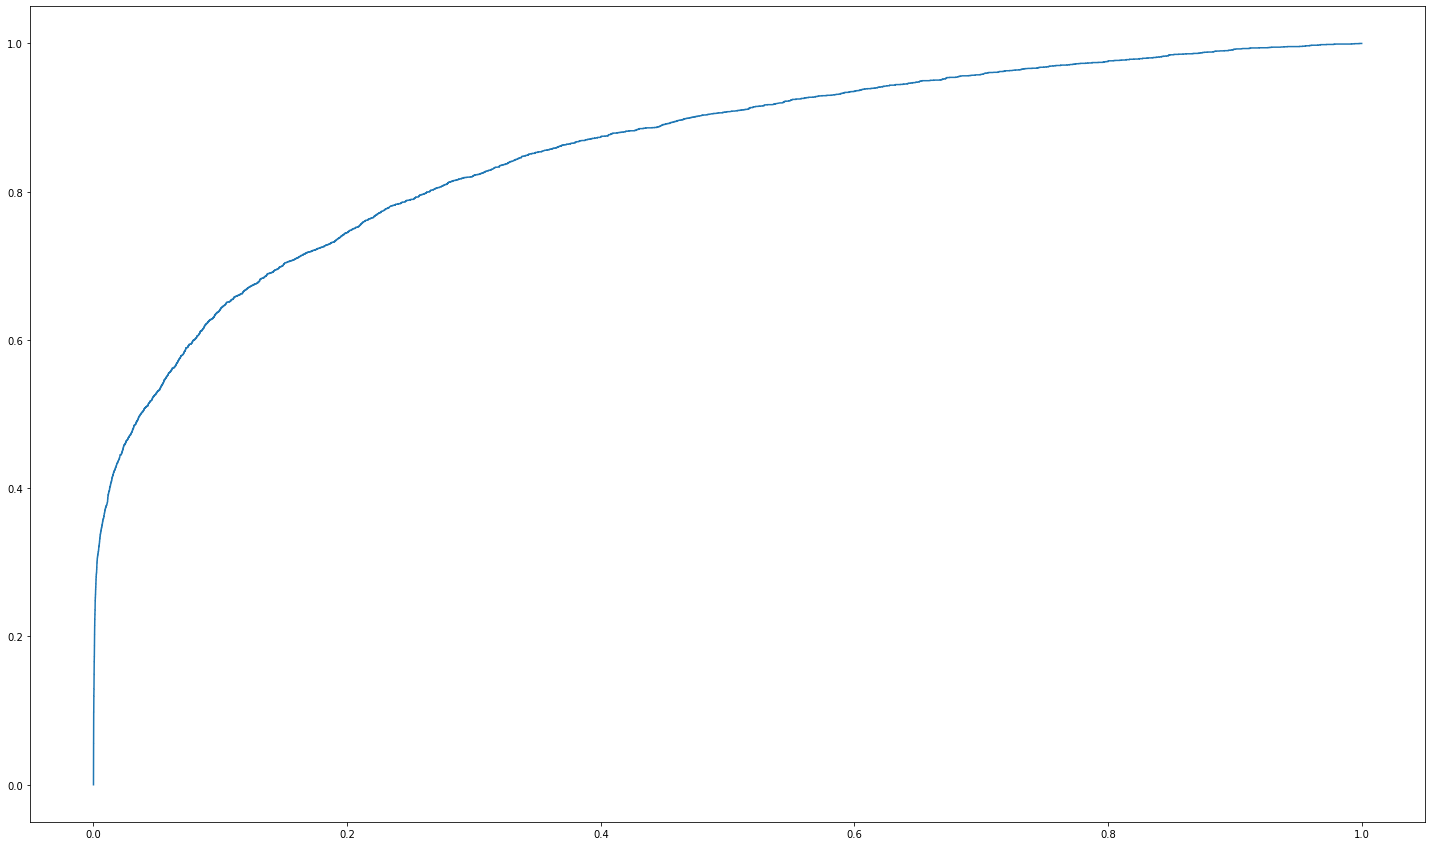

In [100]:
fig = plt.figure(figsize=(25, 15))

pred = model_xgb_nf.predict(test_xgb_nf)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_xgb_num (area = %0.6f)' % roc_auc)

'''
pred = model_xgb_cf.predict(test_xgb_cf)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='dtest_xgb_num_cat (area = %0.6f)' % roc_auc)
'''

pred = model_cat_nf.predict(test_cat_nf)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_cat_num (area = %0.6f)' % roc_auc)

pred = model_cat_cf.predict(test_cat_cf)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_cat2 (area = %0.6f)' % roc_auc)

pred = model_cat_cat.predict(test_cat_cat)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_cat_categorical (area = %0.6f)' % roc_auc)

'''
pred = model_lgbm_cf.predict(test_lgbm_cf)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_lgbm_cat (area = %0.6f)' % roc_auc)


pred = model_lgbm_cat.predict(test_lgbm_cat)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_lgbm_categorical (area = %0.6f)' % roc_auc)

pred = model_lgbm_nf.predict(test_lgbm_nf)
fpr, tpr, _ = roc_curve(test_target, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='test_lgbm_num (area = %0.6f)' % roc_auc)
'''




Нормально рисуется лишь один график. Остальные или странные, или ошибка. Успел лишь разобраться что тестовый и трейновый датасет для категорий изначально имеют одинаковые признаки, но после pd.get_dummies у них разное количество колонок.